In [34]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load Dataset

In [35]:
file_path='./Sales-Data.xlsx'
df = pd.read_excel(file_path)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


# Data Cleaning

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2824 non-null   int64         
 1   QUANTITYORDERED  2824 non-null   int64         
 2   PRICEEACH        2824 non-null   float64       
 3   ORDERDATE        2824 non-null   datetime64[ns]
 4   STATUS           2824 non-null   object        
 5   PRODUCTLINE      2824 non-null   object        
 6   PRODUCTCODE      2824 non-null   object        
 7   CUSTOMERNAME     2824 non-null   object        
 8   CITY             2824 non-null   object        
 9   DEALSIZE         2824 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 220.8+ KB


In [37]:
df.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERDATE          0
STATUS             0
PRODUCTLINE        0
PRODUCTCODE        0
CUSTOMERNAME       0
CITY               0
DEALSIZE           0
dtype: int64

In [38]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['ORDERDATE'].isna().sum()

0

In [39]:
df.duplicated().sum()
df[df.duplicated()]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
121,10111,28,64.33,2003-03-25,Shipped,Vintage Cars,S18_2957,Mini Wheels Co.,San Francisco,Small


In [40]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [41]:
print(df['STATUS'].unique())
print(df['PRODUCTLINE'].unique())
print(df['DEALSIZE'].unique())

['Shipped' 'Resolved' 'Cancelled' 'On Hold' 'Disputed' 'In Process']
['Vintage Cars' 'Classic Cars' 'Trucks and Buses' 'Trains' 'Ships'
 'Planes' 'Motorcycles']
['Medium' 'Small' 'Large']


# Exploratory Data Analysis (EDA)

## Total Sales per Product Line

In [42]:
df['SALES'] = df['QUANTITYORDERED'] * df['PRICEEACH']

In [48]:
sales_by_product = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
print(sales_by_product)

PRODUCTLINE
Classic Cars        2968546.40
Vintage Cars        1644212.05
Motorcycles          971086.29
Trucks and Buses     947355.18
Planes               877942.21
Ships                677940.40
Trains               203804.26
Name: SALES, dtype: float64


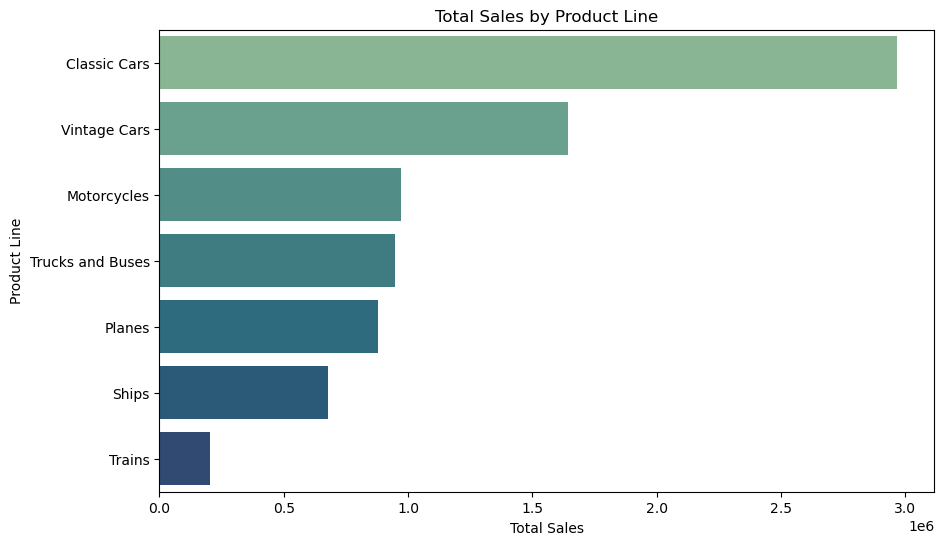

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='crest')
plt.title('Total Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()

## Sales Performance Over Time

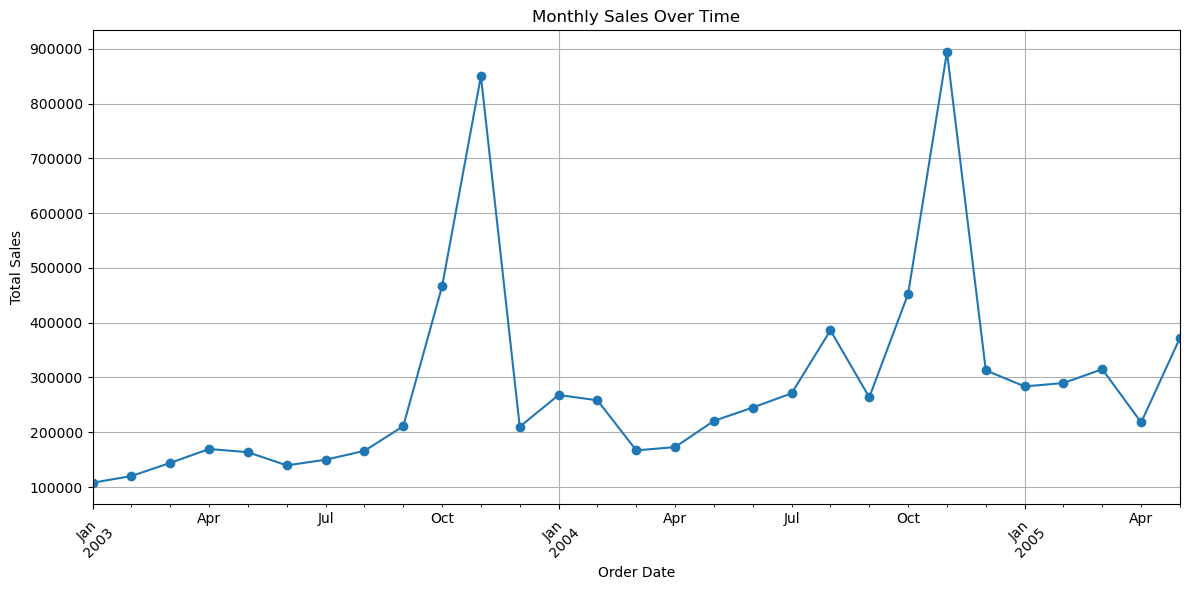

In [45]:
monthly_sales = df.set_index('ORDERDATE').resample('M')['SALES'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Deal Size Correlation with Total Sales

### Which category contributes the most to total sales?

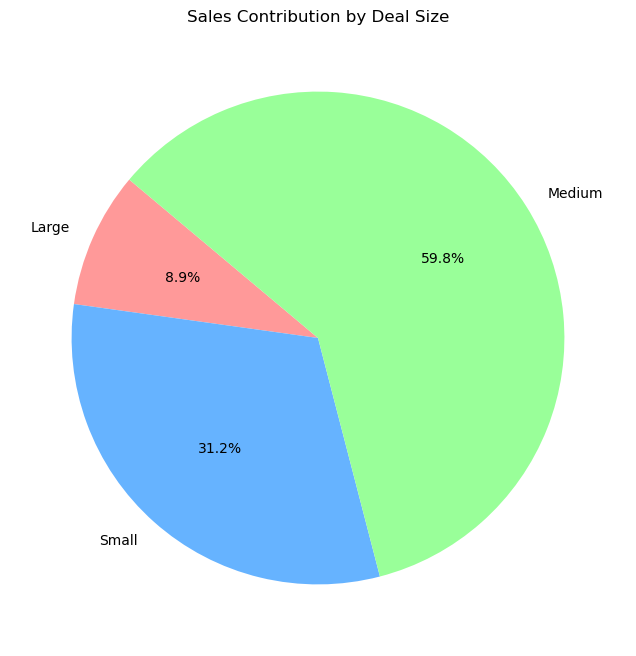

In [46]:
deal_sales = df.groupby('DEALSIZE')['SALES'].sum().sort_values()
deal_percentage = (deal_sales / deal_sales.sum()) * 100

# Pie chart
plt.figure(figsize=(8,8))
deal_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sales Contribution by Deal Size')
plt.ylabel('')
plt.show()

### How much is the typical sales value per transaction in this category?

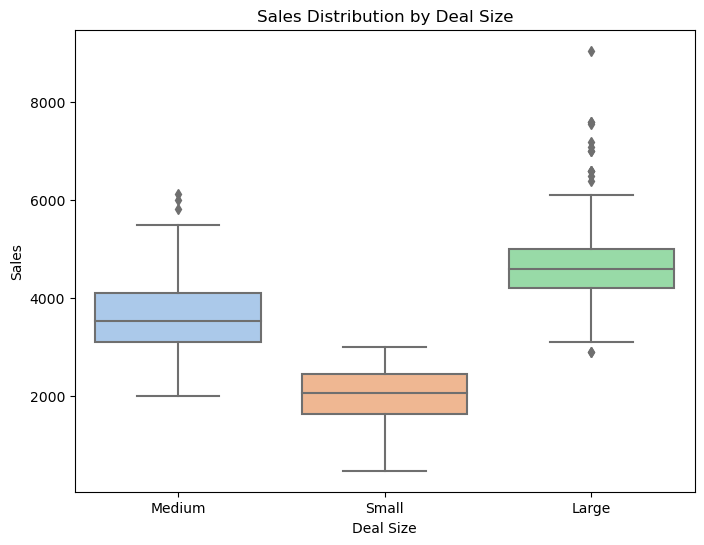

In [47]:
# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='DEALSIZE', y='SALES', palette='pastel')
plt.title('Sales Distribution by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Sales')
plt.show()

# Conclusion

### 1. The product line with the highest sales is "Classic Cars", while the lowest is "Trains".
### 2. Sales tend to increase at the end of the year (November–December), indicating a seasonal pattern.
### 3. Transaction size influenced total sales, with Large transactions having the highest value per transaction but the smallest number. Conversely, Medium transactions dominated both in terms of frequency and total sales value, contributing the largest amount at 59.8%, followed by Small at 31.2%, and Large at 8.9%. This indicates that while large transactions have high value individually, the frequency of medium-sized transactions is a more significant contributor to total sales.